In [1]:
from typing import Annotated,TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages 

from langchain_ollama import ChatOllama


In [2]:
llm = ChatOllama(model="llama2:7b",base_url="http://localhost:11434")

In [3]:
llm.invoke("Hi")

AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'model': 'llama2:7b', 'created_at': '2025-05-29T04:37:26.8484386Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 58579977500, 'load_duration': 29797293000, 'prompt_eval_count': 21, 'prompt_eval_duration': 19960000000, 'eval_count': 26, 'eval_duration': 8797000000}, id='run--ec7fe801-ba6f-4fbe-ad91-118c0e308331-0', usage_metadata={'input_tokens': 21, 'output_tokens': 26, 'total_tokens': 47})

In [5]:
class State(TypedDict):
    messages:Annotated[list,add_messages]
    
def bot(state:State):
    response = llm.invoke(state["messages"])
    return {"messages":[response]}

#building graph

graph_build = StateGraph(State)
graph_build.add_node("chatbot",bot)
graph_build.add_edge(START,"chatbot")
graph_build.add_edge("chatbot",END)

graph = graph_build.compile()



In [6]:
graph

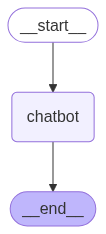

In [7]:
from IPython.display import display,Image


display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
graph.invoke({"messages":["what is a LLM?"]})

{'messages': [HumanMessage(content='what is a LLM?', additional_kwargs={}, response_metadata={}, id='3ca633cd-c68d-4dad-9fdb-878c5f740582'),
  AIMessage(content="\nAn LLM, or Master of Laws, is a postgraduate degree that focuses on advanced legal studies. It is typically a one-year program that is designed for students who have already completed a law degree, such as a Juris Doctor (JD) or Bachelor of Laws (LLB).\n\nAn LLM program allows students to specialize in a particular area of law, such as corporate law, intellectual property law, international law, or tax law, among others. The program typically consists of coursework, research, and sometimes, clinical work. It is designed to provide students with advanced knowledge and skills in their chosen area of law, as well as the ability to analyze and solve complex legal problems.\n\nAn LLM degree can be useful for several reasons:\n\n1. Specialization: An LLM degree allows students to specialize in a particular area of law, which can b